In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Plotting

def get_df_from_pred_array(pred_arr, n_points, offset=1):
    # pred_arr --> b x pts-1
    batch_size = pred_arr.shape[0]
    flattened_arr = pred_arr.ravel()
    points = np.array(list(range(offset, n_points)) * batch_size)
    df = pd.DataFrame({"y": flattened_arr, "x": points})
    return df


def lineplot_with_ci(pred_or_err_arr, n_points, offset, label, ax, color='darkred', marker='s', alpha=1):
    sns.lineplot(
        data=get_df_from_pred_array(pred_or_err_arr, n_points=n_points, offset=offset),
        y="y",
        x="x",
        label=label,
        ax=ax,
        n_boot=1000,
        errorbar=('ci', 90),
        color=color,
        marker=marker,
        linewidth=2,
        markersize=4,
        legend=False,
        alpha=alpha
    )


signal = '16QAM'
SNR = 3





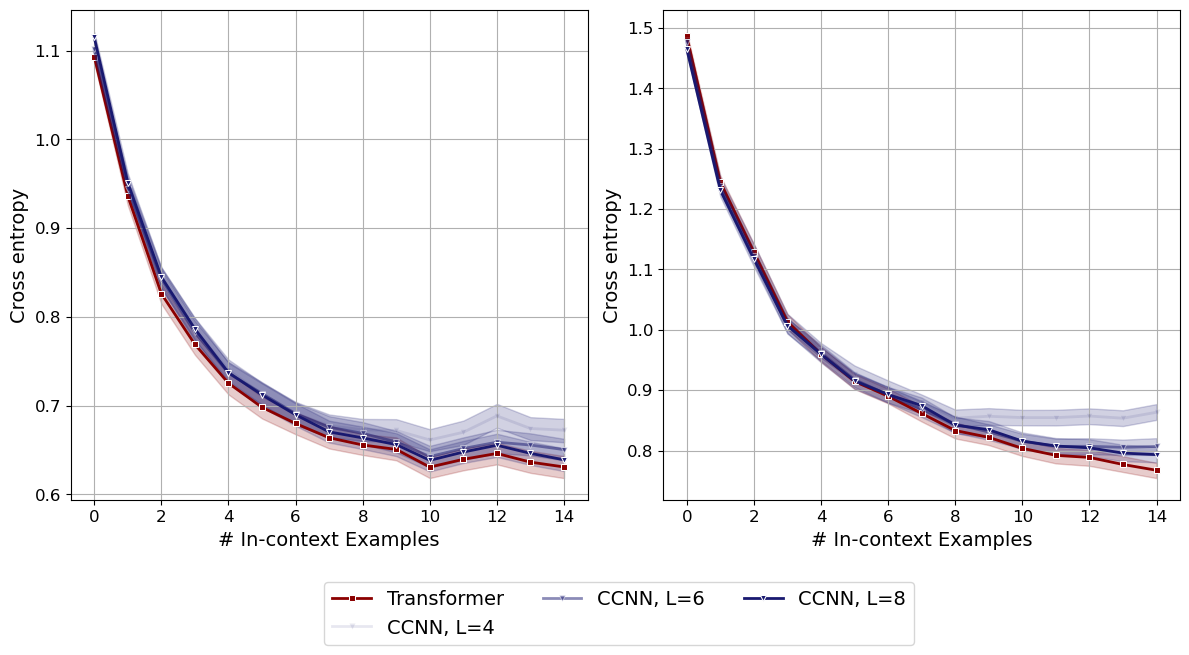

In [19]:
LSTM = False
TF = True
RNN = False
CCNN = True


models_plotting = ""
task = "detection_time_invariant_snr_neg5"

# Plot time-invariant scenario using LSTM and TF

LSTM_SNR_Neg5_one_ray = np.load(f'../Files/CE_one_ray_lstm_{task}.npy')
LSTM_SNR_Neg5_fading = np.load(f'../Files/CE_fading_lstm_{task}.npy')

TF_SNR_Neg5_one_ray = np.load(f'../Files/CE_one_ray_tf_{task}.npy')
TF_SNR_Neg5_fading = np.load(f'../Files/CE_fading_tf_{task}.npy')

RNN_SNR_Neg5_one_ray = np.load(f'../Files/CE_one_ray_rnn_{task}.npy')
RNN_SNR_Neg5_fading = np.load(f'../Files/CE_fading_rnn_{task}.npy')

CCNN_SNR_Neg5_one_ray_nl_4 = np.load(f'../Files/CE_one_ray_ccnn_{task}_nl_4.npy')
CCNN_SNR_Neg5_fading_nl_4 = np.load(f'../Files/CE_fading_ccnn_{task}_nl_4.npy')

CCNN_SNR_Neg5_one_ray_nl_6 = np.load(f'../Files/CE_one_ray_ccnn_{task}_nl_6.npy')
CCNN_SNR_Neg5_fading_nl_6 = np.load(f'../Files/CE_fading_ccnn_{task}_nl_6.npy')

CCNN_SNR_Neg5_one_ray_nl_8 = np.load(f'../Files/CE_one_ray_ccnn_{task}_nl_8.npy')
CCNN_SNR_Neg5_fading_nl_8 = np.load(f'../Files/CE_fading_ccnn_{task}_nl_8.npy')



fig, axs = plt.subplots(1, 2, figsize=(6*2, 6), sharex=True)

_, max_n_points = TF_SNR_Neg5_one_ray.shape

if LSTM:
        models_plotting += "LSTM_"
        lineplot_with_ci(LSTM_SNR_Neg5_one_ray,
                n_points=max_n_points,
                offset=0,
                label="LSTM",
                ax=axs[0],
                color='steelblue',
                marker='o')
        lineplot_with_ci(LSTM_SNR_Neg5_fading,
                n_points=max_n_points,
                offset=0,
                label="LSTM",
                ax=axs[1],
                color='steelblue',
                marker='o')


if RNN:
        models_plotting += "RNN_"
        lineplot_with_ci(RNN_SNR_Neg5_one_ray,
                n_points=max_n_points,
                offset=0,
                label="RNN",
                ax=axs[0],
                color='k',
                marker='x')
        lineplot_with_ci(RNN_SNR_Neg5_fading,
        n_points=max_n_points,
        offset=0,
        label="RNN",
        ax=axs[1],
        color='k',
        marker='x')


if TF:
        models_plotting += "TF_"
        lineplot_with_ci(TF_SNR_Neg5_one_ray,
                n_points=max_n_points,
                offset=0,
                label="Transformer",
                ax=axs[0])

        lineplot_with_ci(TF_SNR_Neg5_fading,
                n_points=max_n_points,
                offset=0,
                label="Transformer",
                ax=axs[1])
        
if CCNN:
       models_plotting += "CCNN_"
       
       lineplot_with_ci(CCNN_SNR_Neg5_one_ray_nl_4,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=4",
                ax=axs[0],
                color='midnightblue',
                marker='v', alpha=0.1)
       
       lineplot_with_ci(CCNN_SNR_Neg5_fading_nl_4,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=4",
                ax=axs[1],
                color='midnightblue',
                marker='v', alpha=0.1)
       

       lineplot_with_ci(CCNN_SNR_Neg5_one_ray_nl_6,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=6",
                ax=axs[0],
                color='midnightblue',
                marker='v', alpha=0.5)
       
       lineplot_with_ci(CCNN_SNR_Neg5_fading_nl_6,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=6",
                ax=axs[1],
                color='midnightblue',
                marker='v', alpha=0.5)
       
       lineplot_with_ci(CCNN_SNR_Neg5_one_ray_nl_8,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=8",
                ax=axs[0],
                color='midnightblue',
                marker='v')
       
       lineplot_with_ci(CCNN_SNR_Neg5_fading_nl_8,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=8",
                ax=axs[1],
                color='midnightblue',
                marker='v')
       

        


for ax in axs:
    ax.grid()
    ax.set_xlabel("# In-context Examples", fontsize=14)
    ax.set_ylabel("Cross entropy", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center',bbox_to_anchor=(0.52,-0.15), ncol=3, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'../Plots/CE_seq_models_{task}_{models_plotting}_500k_nl_4_vs_6_vs_8.png', dpi=400, bbox_inches='tight')

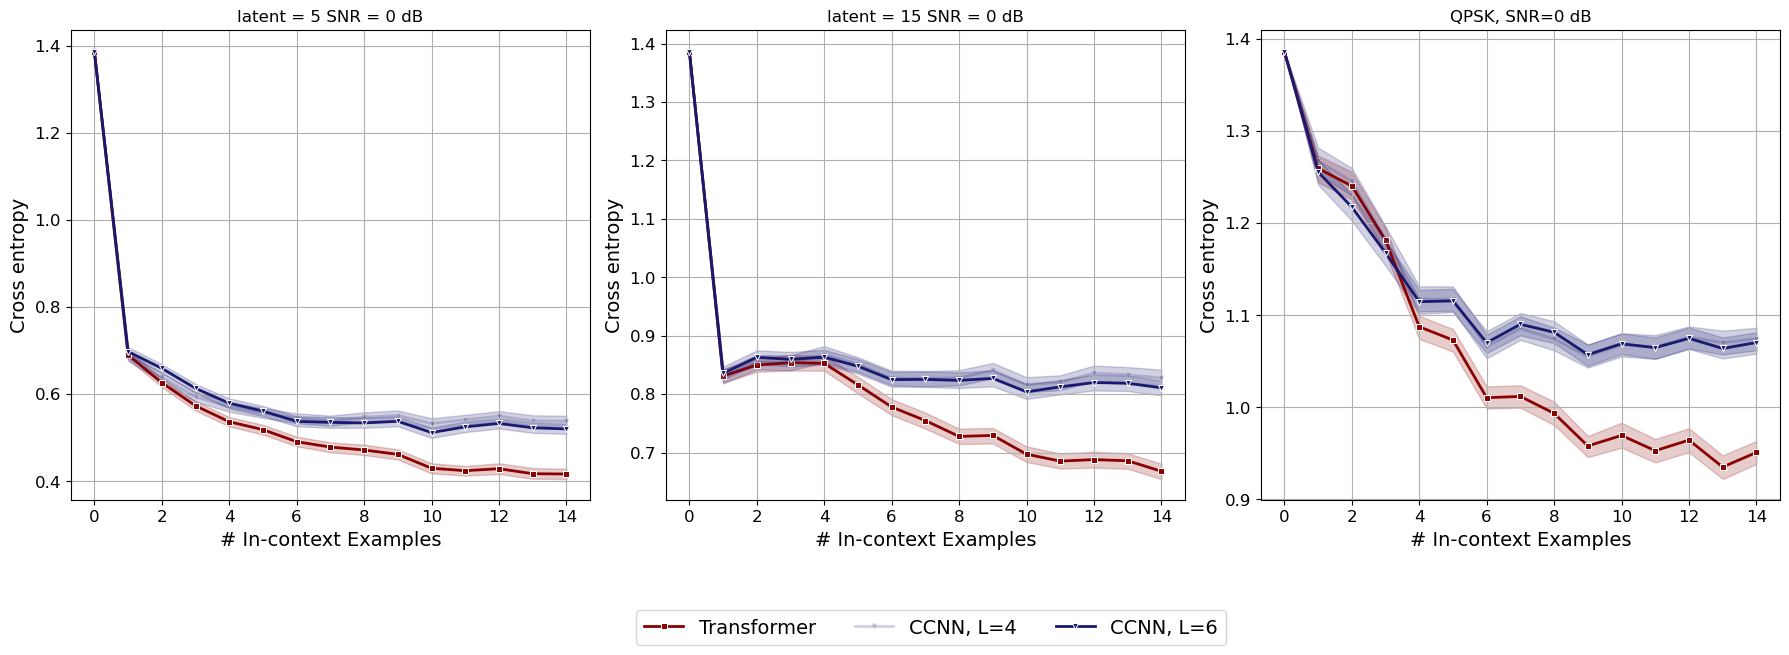

In [28]:
# Plot time-variant scenario using LSTM and TF

LSTM = False
RNN = False
TF = True
CCNN = True

task = 'detection_time_variant_snr_0'
models_plotting = ""

LSTM_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_lstm_{task}.npy')
LSTM_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_lstm_{task}.npy')
LSTM_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_lstm_{task}.npy')

TF_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_tf_{task}.npy')
TF_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_tf_{task}.npy')
TF_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_tf_{task}.npy')

RNN_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_rnn_{task}.npy')
RNN_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_rnn_{task}.npy')
RNN_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_rnn_{task}.npy')

CCNN_SNR_0_v1_5_nl_4 = np.load(f'../Files/v1_5_CE_ccnn_{task}_nl_4.npy')
CCNN_SNR_0_v2_15_nl_4 = np.load(f'../Files/v2_15_CE_ccnn_{task}_nl_4.npy')
CCNN_SNR_0_v3_30_nl_4 = np.load(f'../Files/v3_30_CE_ccnn_{task}_nl_4.npy')

CCNN_SNR_0_v1_5_nl_6 = np.load(f'../Files/v1_5_CE_ccnn_{task}_nl_6.npy')
CCNN_SNR_0_v2_15_nl_6 = np.load(f'../Files/v2_15_CE_ccnn_{task}_nl_6.npy')
CCNN_SNR_0_v3_30_nl_6 = np.load(f'../Files/v3_30_CE_ccnn_{task}_nl_6.npy')

latents = (5, 15, 30)
n_axs = 3

fig, axs = plt.subplots(1, n_axs, figsize=(6*n_axs, 6), sharex=True)

_, max_n_points = TF_SNR_0_v1_5.shape

if LSTM:
        models_plotting += "LSTM_"
        lineplot_with_ci(LSTM_SNR_0_v1_5,
                n_points=max_n_points,
                offset=0,
                label="LSTM",
                ax=axs[0],
                color='steelblue',
                marker='o')
        
        lineplot_with_ci(LSTM_SNR_0_v2_15,
                n_points=max_n_points,
                offset=0,
                label="LSTM",
                ax=axs[1],
                color='steelblue',
                marker='o')
        
        lineplot_with_ci(LSTM_SNR_0_v3_30,
                n_points=max_n_points,
                offset=0,
                label="LSTM",
                ax=axs[2],
                color='steelblue',
                marker='o')


if RNN:
        models_plotting += "RNN_"
        lineplot_with_ci(RNN_SNR_0_v1_5,
                n_points=max_n_points,
                offset=0,
                label="RNN",
                ax=axs[0],
                color='k',
                marker='x')

        lineplot_with_ci(RNN_SNR_0_v2_15,
                n_points=max_n_points,
                offset=0,
                label="RNN",
                ax=axs[1],
                color='k',
                marker='x')

        lineplot_with_ci(RNN_SNR_0_v3_30,
                n_points=max_n_points,
                offset=0,
                label="RNN",
                ax=axs[2],
                color='k',
                marker='x')



if TF:
        models_plotting += "TF_"
        lineplot_with_ci(TF_SNR_0_v1_5,
                n_points=max_n_points,
                offset=0,
                label="Transformer",
                ax=axs[0])

        lineplot_with_ci(TF_SNR_0_v2_15,
                n_points=max_n_points,
                offset=0,
                label="Transformer",
                ax=axs[1])

        lineplot_with_ci(TF_SNR_0_v3_30,
                n_points=max_n_points,
                offset=0,
                label="Transformer",
                ax=axs[2])
        
if CCNN:
        models_plotting += "CCNN_"
        lineplot_with_ci(CCNN_SNR_0_v1_5_nl_4,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=4",
                ax=axs[0],
                color='midnightblue',
                marker='v', alpha=0.2)

        lineplot_with_ci(CCNN_SNR_0_v2_15_nl_4,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=4",
                ax=axs[1],
                color='midnightblue',
                marker='v', alpha=0.2)

        lineplot_with_ci(CCNN_SNR_0_v3_30_nl_4,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=4",
                ax=axs[2],
                color='midnightblue',
                marker='v', alpha=0.2)
        
        lineplot_with_ci(CCNN_SNR_0_v1_5_nl_6,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=6",
                ax=axs[0],
                color='midnightblue',
                marker='v')

        lineplot_with_ci(CCNN_SNR_0_v2_15_nl_6,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=6",
                ax=axs[1],
                color='midnightblue',
                marker='v')

        lineplot_with_ci(CCNN_SNR_0_v3_30_nl_6,
                n_points=max_n_points,
                offset=0,
                label="CCNN, L=6",
                ax=axs[2],
                color='midnightblue',
                marker='v')


axs[0].set_title(f'latent = 5 SNR = 0 dB')
axs[1].set_title(f'latent = 15 SNR = 0 dB')
axs[2].set_title(f'latent = 30 SNR = 0 dB')

for ax in axs:
    ax.grid()
    ax.set_xlabel("# In-context Examples", fontsize=14)
    ax.set_ylabel("Cross entropy", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center',bbox_to_anchor=(0.52,-0.15), ncol=3, fontsize=14)

plt.title('QPSK, SNR=0 dB')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'../Plots/CE_seq_models_{task}_{models_plotting}500k_nl_4_vs_6.png', dpi=400, bbox_inches='tight')

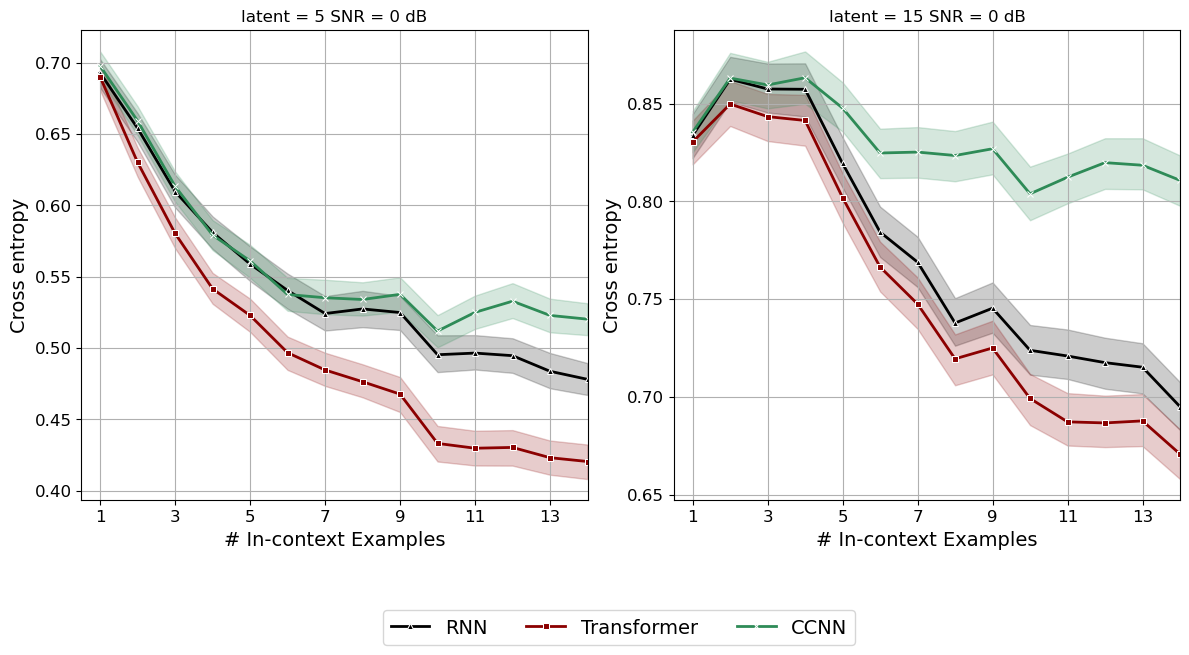

In [17]:
# Final plot time-variant scenario for the rebuttal

LSTM = False
RNN = True
TF = True
CCNN = True

tf_model_name = "d_256_l_6_h_8"
task = 'detection_time_variant_snr_0'
models_plotting = ""

LSTM_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_lstm_{task}.npy')
LSTM_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_lstm_{task}.npy')
LSTM_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_lstm_{task}.npy')

TF_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_tf_{task}_{tf_model_name}.npy')
TF_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_tf_{task}_{tf_model_name}.npy')
TF_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_tf_{task}_{tf_model_name}.npy')

RNN_SNR_0_v1_5 = np.load(f'../Files/v1_5_CE_rnn_{task}.npy')
RNN_SNR_0_v2_15 = np.load(f'../Files/v2_15_CE_rnn_{task}.npy')
RNN_SNR_0_v3_30 = np.load(f'../Files/v3_30_CE_rnn_{task}.npy')

CCNN_SNR_0_v1_5_nl_4 = np.load(f'../Files/v1_5_CE_ccnn_{task}_nl_4.npy')
CCNN_SNR_0_v2_15_nl_4 = np.load(f'../Files/v2_15_CE_ccnn_{task}_nl_4.npy')
CCNN_SNR_0_v3_30_nl_4 = np.load(f'../Files/v3_30_CE_ccnn_{task}_nl_4.npy')

CCNN_SNR_0_v1_5_nl_6 = np.load(f'../Files/v1_5_CE_ccnn_{task}_nl_6.npy')
CCNN_SNR_0_v2_15_nl_6 = np.load(f'../Files/v2_15_CE_ccnn_{task}_nl_6.npy')
CCNN_SNR_0_v3_30_nl_6 = np.load(f'../Files/v3_30_CE_ccnn_{task}_nl_6.npy')

latents = (5, 15)
n_axs = len(latents)

fig, axs = plt.subplots(1, n_axs, figsize=(6*n_axs, 6), sharex=True)

_, max_n_points = TF_SNR_0_v1_5.shape

n = 1  # minimum

n_in_context_examples = np.arange(1, max_n_points, 1)

if LSTM:
        models_plotting += "LSTM_"
        lineplot_with_ci(LSTM_SNR_0_v1_5[:, n:],
                n_points=max_n_points,
                offset=n,
                label="LSTM",
                ax=axs[0],
                color='steelblue',
                marker='o')
        
        lineplot_with_ci(LSTM_SNR_0_v2_15[:, n:],
                n_points=max_n_points,
                offset=n,
                label="LSTM",
                ax=axs[1],
                color='steelblue',
                marker='o')
        
        # lineplot_with_ci(LSTM_SNR_0_v3_30,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="LSTM",
        #         ax=axs[2],
        #         color='steelblue',
        #         marker='o')


if RNN:
        models_plotting += "RNN_"
        lineplot_with_ci(RNN_SNR_0_v1_5[:, n:],
                n_points=max_n_points,
                offset=n,
                label="RNN",
                ax=axs[0],
                color='k',
                marker='^')

        lineplot_with_ci(RNN_SNR_0_v2_15[:, n:],
                n_points=max_n_points,
                offset=n,
                label="RNN",
                ax=axs[1],
                color='k',
                marker='^')

        # lineplot_with_ci(RNN_SNR_0_v3_30,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="RNN",
        #         ax=axs[2],
        #         color='k',
        #         marker='^')



if TF:
        models_plotting += "TF_"
        lineplot_with_ci(TF_SNR_0_v1_5[:, n:],
                n_points=max_n_points,
                offset=n,
                label="Transformer",
                ax=axs[0])

        lineplot_with_ci(TF_SNR_0_v2_15[:, n:],
                n_points=max_n_points,
                offset=n,
                label="Transformer",
                ax=axs[1])

        # lineplot_with_ci(TF_SNR_0_v3_30,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="Transformer",
        #         ax=axs[2])
        
if CCNN:
        models_plotting += "CCNN_"
        # lineplot_with_ci(CCNN_SNR_0_v1_5_nl_4,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="CCNN, L=4",
        #         ax=axs[0],
        #         color='midnightblue',
        #         marker='v', alpha=0.2)

        # lineplot_with_ci(CCNN_SNR_0_v2_15_nl_4,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="CCNN, L=4",
        #         ax=axs[1],
        #         color='midnightblue',
        #         marker='v', alpha=0.2)

        # lineplot_with_ci(CCNN_SNR_0_v3_30_nl_4,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="CCNN, L=4",
        #         ax=axs[2],
        #         color='midnightblue',
        #         marker='v', alpha=0.2)
        
        lineplot_with_ci(CCNN_SNR_0_v1_5_nl_6[:, n:],
                n_points=max_n_points,
                offset=n,
                label="CCNN",
                ax=axs[0],
                color='seagreen',
                marker='x')

        lineplot_with_ci(CCNN_SNR_0_v2_15_nl_6[:, n:],
                n_points=max_n_points,
                offset=n,
                label="CCNN",
                ax=axs[1],
                color='seagreen',
                marker='x')

        # lineplot_with_ci(CCNN_SNR_0_v3_30_nl_6,
        #         n_points=max_n_points,
        #         offset=0,
        #         label="CCNN",
        #         ax=axs[2],
        #         color='seagreen',
        #         marker='x')


axs[0].set_title(f'latent = 5 SNR = 0 dB')
axs[1].set_title(f'latent = 15 SNR = 0 dB')
# axs[2].set_title(f'latent = 30 SNR = 0 dB')

for ax in axs:
    ax.grid()
    ax.set_xlim([0.5, 14])
    ax.set_xlabel("# In-context Examples", fontsize=14)
    ax.set_ylabel("Cross entropy", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # set xticks from 1 to 14
    ax.set_xticks(np.arange(1, 14, 2))

lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center',bbox_to_anchor=(0.52,-0.15), ncol=3, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f'../Plots/CE_seq_models_{task}_{models_plotting}for_final_rebuttal_small_tf_model.png', dpi=400, bbox_inches='tight')